In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine,load_digits, load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold

from sklearn.metrics import precision_recall_fscore_support

from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import make_classification

In [3]:

from sklearn.feature_extraction.text import CountVectorizer

sentences = [
"Công nghệ ngày nay đóng vai trò quan trọng trong mọi lĩnh vực của cuộc sống.",
"Internet đã thay đổi cách chúng ta giao tiếp và truy cập thông tin.",
"Smartphone đã trở thành một phần không thể thiếu trong đời sống hàng ngày.",
"Công nghệ AI (Trí tuệ nhân tạo) đang ngày càng được ứng dụng rộng rãi.",
"Blockchain đang được sử dụng để tăng tính bảo mật trong giao dịch trực tuyến.",
"Ô tô tự lái là một xu hướng công nghệ đang phát triển mạnh mẽ.",
"Internet of Things (IoT) đang mở ra những cơ hội mới trong việc kết nối các thiết bị.",
"Công nghệ VR (Thực tế ảo) đang thay đổi cách chúng ta trải nghiệm thế giới xung quanh.",
"Robot đang được phát triển để hỗ trợ con người trong nhiều công việc khác nhau.",
"Big Data đang giúp chúng ta phân tích thông tin lớn và tìm ra các xu hướng.",
"5G đang mang lại tốc độ kết nối nhanh hơn và mạng lưới rộng lớn hơn.",
"Công nghệ 3D printing đang thúc đẩy sự tiến bộ trong sản xuất và y tế.",
"Trí tuệ nhân tạo (AI) đang được áp dụng trong nhiều lĩnh vực từ tự động hóa đến y tế.",
"Công nghệ Blockchain đang được sử dụng để xây dựng các hệ thống tài chính phi tập trung.",
"Công nghệ cloud computing đang giúp tối ưu hóa lưu trữ và xử lý dữ liệu.",
"Công nghệ Quantum đang mở ra những khả năng mới trong lĩnh vực tính toán và bảo mật.",
"Máy bay không người lái đang được phát triển để áp dụng trong nhiều mục đích từ vận tải đến quân sự.",
"Công nghệ AR (Thực tế Tăng cường) đang mở ra những trải nghiệm mới trong giáo dục và giải trí.",
"Công nghệ xử lý ngôn ngữ tự nhiên (NLP) đang giúp chúng ta tương tác với máy tính một cách tự nhiên hơn.",
"Công nghệ Renewable Energy đang giúp chúng ta chuyển đổi sang nguồn năng lượng sạch hơn.",
"Công nghệ Blockchain đang giúp tăng cường tính bảo mật trong các giao dịch tài chính và dữ liệu.",
"Công nghệ edge computing đang giúp tăng cường hiệu suất và bảo mật trong việc xử lý dữ liệu.",
"Công nghệ biometrics đang được áp dụng rộng rãi trong việc xác thực danh tính và bảo mật thông tin.",
"Công nghệ 5G đang mở ra những tiềm năng mới trong việc phát triển các ứng dụng và dịch vụ di động.",
"Công nghệ Blockchain đang được sử dụng để tăng cường tính minh bạch và an toàn trong các hệ thống tài chính và logictics.",
"Du lịch là hoạt động giúp con người khám phá vẻ đẹp của thế giới xung quanh.",
"Việc du lịch giúp thư giãn tinh thần và tạo ra những kỷ niệm đáng nhớ.",
"Khám phá văn hóa và lịch sử của một đất nước là một phần quan trọng của trải nghiệm du lịch.",
"Du lịch cũng mang lại cơ hội gặp gỡ và giao lưu với các nền văn hóa khác nhau.",
"Thưởng thức ẩm thực địa phương là một phần quan trọng của trải nghiệm du lịch.",
"Du lịch có thể giúp mở rộng tầm nhìn và hiểu biết về thế giới.",
"Khám phá các địa điểm thiên nhiên đẹp là một phần thú vị của du lịch.",
"Du lịch nông nghiệp giúp du khách trải nghiệm cuộc sống ở nông thôn và tham gia vào các hoạt động truyền thống.",
"Thăm các di tích và danh lam thắng cảnh là cách tuyệt vời để hiểu sâu hơn về lịch sử của một quốc gia.",
"Du lịch biển mang lại cơ hội tận hưởng những bãi biển tuyệt đẹp và tham gia vào các hoạt động nước.",
"Việc tham gia vào du lịch mạo hiểm giúp tạo ra những trải nghiệm thú vị và hồi hộp.",
"Du lịch công viên quốc gia là cách tốt nhất để tiếp xúc với thiên nhiên hoang dã và bảo tồn.",
"Mua sắm đặc sản là một phần không thể thiếu của trải nghiệm du lịch.",
"Thăm các làng truyền thống giúp hiểu biết về văn hóa và lối sống của dân tộc địa phương.",
"Cảm nhận không khí yên bình và thư giãn tại các khu resort và spa.",
"Du lịch cũng là cơ hội để tham gia vào các hoạt động giáo dục và học hỏi mới.",
"Tham gia vào các lễ hội và sự kiện địa phương giúp trải nghiệm văn hóa đặc sắc của mỗi đất nước.",
"Du lịch tình bạn là cách tuyệt vời để tạo kỷ niệm và chia sẻ trải nghiệm với bạn bè và người thân.",
"Du lịch khám phá là cơ hội để tìm hiểu về các loài động vật và thiên nhiên đa dạng trên thế giới.",
"Tham gia vào các tour du lịch cộng đồng giúp ủng hộ kinh tế địa phương và gắn kết cộng đồng.",
"Du lịch giáo dục giúp mở mang kiến thức và hiểu biết về lịch sử, văn hóa và tự nhiên.",
"Việc khám phá các thành phố lớn là cơ hội để tham quan các điểm du lịch nổi tiếng và thưởng thức cuộc sống đô thị.",
"Du lịch là cơ hội để thư giãn và tận hưởng cuộc sống ngoài trời.",
"Đi du lịch cùng gia đình là cơ hội tốt để tạo ra những kỷ niệm đáng nhớ và tăng cường mối quan hệ.",
"Mỗi chuyến du lịch là một cơ hội để khám phá và trải nghiệm cái mới, làm giàu tinh thần và kỷ niệm.",
"Địa lý là một lĩnh vực nghiên cứu về địa hình, khí hậu, và môi trường tự nhiên.",
"Nó giúp chúng ta hiểu về sự đa dạng của các vùng đất trên Trái Đất.",
"Khám phá địa lý giúp chúng ta hiểu về cấu trúc địa chất và hình thành của các địa hình.",
"Khí hậu là yếu tố quan trọng trong địa lý vì nó ảnh hưởng đến cuộc sống và hoạt động của con người.",
"Các hệ thống sông ngòi, hồ nước và dãy núi là các yếu tố quan trọng trong địa lý vùng đất.",
"Địa lý cũng nghiên cứu về sự phân bố địa lý của các loài động và thực vật trên Trái Đất.",
"Nó cung cấp kiến thức về các quốc gia, thành phố, và các địa danh trên toàn thế giới.",
"Địa lý kinh tế nghiên cứu về phân bố nguồn tài nguyên và hoạt động kinh tế trên các vùng đất.",
"Thảo luận về địa lý cũng bao gồm việc nghiên cứu về dân số và sự phát triển của các cộng đồng.",
"Nó còn liên quan đến các vấn đề xã hội và môi trường, như biến đổi khí hậu và quản lý tài nguyên.",
"Địa lý chính trị nghiên cứu về phân bố quyền lực và lãnh thổ giữa các quốc gia và vùng lãnh thổ.",
"Nó cũng liên quan đến việc nghiên cứu về các vùng xung đột và quan hệ quốc tế.",
"Các sự kiện địa lý, như động đất và lụt lớn, cũng là một phần của nghiên cứu địa lý.",
"Địa lý cũng là một công cụ quan trọng trong việc dự đoán và đối phó với các rủi ro tự nhiên.",
"Nghiên cứu địa lý cung cấp những thông tin cần thiết cho việc bảo vệ môi trường và duy trì sự cân bằng sinh thái.",
"Nó cũng liên quan đến việc nghiên cứu về sự thay đổi địa lý do tác động của con người và tự nhiên.",
"Địa lý cung cấp cơ sở cho việc phát triển các chính sách về sử dụng đất và quản lý tài nguyên.",
"Nó giúp chúng ta hiểu về mối liên kết giữa con người và môi trường sống của họ.",
"Địa lý là một lĩnh vực đa ngành, liên kết với nhiều lĩnh vực khác nhau như văn hóa, lịch sử và kinh tế.",
"Nó cung cấp cái nhìn tổng quan về cấu trúc và sự phát triển của trái đất.",
"Nghiên cứu địa lý cũng liên quan đến việc dự báo và ứng phó với biến đổi khí hậu.",
"Địa lý cũng cung cấp cơ sở cho việc hiểu biết về sự phát triển và biến đổi của các vùng đất.",
"Nó đóng vai trò quan trọng trong việc xây dựng và phát triển của một quốc gia và cộng đồng."
]

NhanY=["Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Congnghe",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Dulich",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali",
       "Diali"]

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(sentences)

vocabulary = vectorizer.get_feature_names_out()


In [4]:
print("Danh sách từ vựng: ")
print(vocabulary)

DataX = []

for i, sentences in enumerate(sentences):
  print(f"Biểu diển vecter BoW cho câu {i+1}:")
  print(X[i].toarray())
  for each in X[i].toarray():
    DataX.append(each)
print(DataX)

from sklearn.model_selection import train_test_split
(X_Train, X_Test, Y_Train, Y_Test) = train_test_split(DataX, NhanY, test_size=0.2, random_state=42)

Danh sách từ vựng: 
['3d' '5g' 'ai' 'an' 'ar' 'bao' 'bay' 'big' 'biometrics' 'biến' 'biết'
 'biển' 'blockchain' 'báo' 'bãi' 'bè' 'bình' 'bạch' 'bạn' 'bảo' 'bằng'
 'bị' 'bố' 'bộ' 'chia' 'cho' 'chuyến' 'chuyển' 'chính' 'chúng' 'chất'
 'cloud' 'computing' 'con' 'cung' 'cuộc' 'càng' 'các' 'cách' 'cái' 'cân'
 'còn' 'có' 'công' 'cùng' 'cũng' 'cơ' 'cường' 'cảm' 'cảnh' 'cấp' 'cấu'
 'cần' 'cập' 'cộng' 'cụ' 'của' 'cứu' 'danh' 'data' 'di' 'do' 'du' 'duy'
 'dân' 'dã' 'dãy' 'dạng' 'dịch' 'dục' 'dụng' 'dữ' 'dự' 'dựng' 'edge'
 'energy' 'gia' 'giao' 'giàu' 'giáo' 'giãn' 'giúp' 'giải' 'giới' 'giữa'
 'gắn' 'gặp' 'gồm' 'gỡ' 'hiểm' 'hiểu' 'hiệu' 'hoang' 'hoạt' 'hàng' 'hình'
 'hóa' 'hơn' 'hướng' 'hưởng' 'hậu' 'hệ' 'họ' 'học' 'hỏi' 'hồ' 'hồi' 'hỗ'
 'hộ' 'hội' 'hộp' 'internet' 'iot' 'khu' 'khác' 'khách' 'khám' 'khí'
 'không' 'khả' 'kinh' 'kiến' 'kiện' 'kết' 'kỷ' 'lam' 'liên' 'liệu'
 'logictics' 'loài' 'luận' 'là' 'làm' 'làng' 'lái' 'lãnh' 'lý' 'lĩnh'
 'lưu' 'lưới' 'lượng' 'lại' 'lễ' 'lịch' 'lối' 'lớn' 'lụt' 

In [5]:
model = DecisionTreeClassifier(random_state=20)
model.fit(X_Train, Y_Train)

DecisionTreeClassifier(random_state=20)

In [6]:
predicted=model.predict([X_Test[8]])
print("Actual Value:", Y_Test[8])
print("Predicted Value:",predicted[0])

Actual Value: Congnghe
Predicted Value: Congnghe


In [7]:
# Du doan (TEST) .predict()

Y_DuDoan = model.predict(X_Test)
print("Ket qua du doan:", Y_DuDoan)
print("Ket qua thuc te:", Y_Test)

Ket qua du doan: ['Congnghe' 'Diali' 'Congnghe' 'Diali' 'Dulich' 'Diali' 'Congnghe'
 'Dulich' 'Congnghe' 'Diali' 'Diali' 'Dulich' 'Congnghe' 'Dulich'
 'Congnghe']
Ket qua thuc te: ['Congnghe', 'Diali', 'Congnghe', 'Congnghe', 'Dulich', 'Diali', 'Congnghe', 'Dulich', 'Congnghe', 'Diali', 'Diali', 'Dulich', 'Congnghe', 'Dulich', 'Congnghe']


In [8]:
from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [9]:
Y_Pred=model.predict(X_Test)

accuray = accuracy_score(Y_Pred, Y_Test)
f1 = f1_score(Y_Pred, Y_Test, average="weighted")

print("Accuracy:",accuray )
print("F1 score:",f1 )

Accuracy: 0.9333333333333333
F1 score: 0.9321937321937322


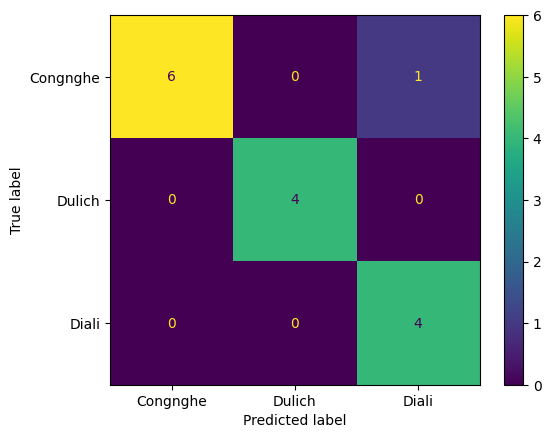

In [10]:
labels = ["Congnghe", "Dulich","Diali"]
cm=confusion_matrix(Y_Test,Y_Pred,labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [11]:
import random
import statistics
temp= []
for each in range(1,10):
  combined = list(zip(DataX, NhanY))
  random.shuffle(combined)
  dulieu_X_shuffled, dulieu_Y_shuffled=zip(*combined)
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled,dulieu_Y_shuffled, test_size=1/3, random_state=125 )

  model = DecisionTreeClassifier()
  model.fit(X_Train, Y_Train)
  Y_Pred = model.predict(X_Test)
  Ketqua_Dochinhxac = accuracy_score(Y_Test, Y_Pred)*100
  temp.append(Ketqua_Dochinhxac)
  print("Do chinh xac la:" , Ketqua_Dochinhxac)
Ketqua = statistics.mean(temp)
print("Trung binh:", Ketqua)


Do chinh xac la: 92.0
Do chinh xac la: 88.0
Do chinh xac la: 96.0
Do chinh xac la: 96.0
Do chinh xac la: 88.0
Do chinh xac la: 92.0
Do chinh xac la: 80.0
Do chinh xac la: 84.0
Do chinh xac la: 84.0
Trung binh: 88.88888888888889


In [12]:
sentence = 'Việt Nam là một điểm đến hấp dẫn của Đông Nam Á thu hút một lượng lớn khách du lịch đến với danh thu cao'

chuoicau = sentence.split()
print(chuoicau)
dactrung = []
for c in vocabulary:
  dem=chuoicau.count(c)
  dactrung.append(dem)
print(dactrung)
Y_DuDoan = model.predict([dactrung])
print(Y_DuDoan)


['Việt', 'Nam', 'là', 'một', 'điểm', 'đến', 'hấp', 'dẫn', 'của', 'Đông', 'Nam', 'Á', 'thu', 'hút', 'một', 'lượng', 'lớn', 'khách', 'du', 'lịch', 'đến', 'với', 'danh', 'thu', 'cao']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,